In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
real_df = pd.read_csv('real_news.csv')

In [32]:
real_df.head()

,label,id,date,user_id,text,pic_url,video_url,comment_num,repost_num,like_num
0,real,be3d74871a5df3a0da2a98dd32e8469f,2020-08-23 18:57,43a971db6364c4ed7cd101feca243600,【转存！#施一公说诚实做学问是绝不容突破的底线#】今天，在西湖大学博士研究生开学典礼上，校长...,[],http://f.video.weibocdn.com/DJBbVGUwlx07FRoDja...,396,601,3955
1,real,1a213783461da197779f9f6a4f118e13,2020-02-18 17:12,43a971db6364c4ed7cd101feca243600,【#区长回应网传北京西城区政府停摆#：目前运转一切正常】2月18日，在北京市新型冠状病毒肺炎...,['https://wx1.sinaimg.cn/orj360/a716fd45ly1gc0...,NaN,765,345,4949
2,real,89c3927b85cc27fea583677d00ee6454,2020-04-21 18:38,43a971db6364c4ed7cd101feca243600,【最新：#全球新冠肺炎感染人数超244万例#】截至北京时间4月21日16时，211个国家和地...,['https://wx3.sinaimg.cn/orj360/a716fd45gy1ge1...,NaN,670,606,3510
3,real,799a54dfe5472de93613dab44f22014e,2020-05-01 08:21,43a971db6364c4ed7cd101feca243600,【今天，发条微博，迎接#五月#】5月，向每一位奋斗中的劳动者致敬；5月，为奋斗中的青年点赞；...,['https://wx4.sinaimg.cn/orj360/a716fd45ly1gec...,NaN,2471,10110,23223
4,real,477c1e86e80e7b29fbf719d188d3bcca,2020-08-02 10:21,43a971db6364c4ed7cd101feca243600,【#大连关停凯洋海鲜公司及周边企业#】今天上午，大连举行新冠肺炎疫情防控工作发布会。会上通报...,[],http://f.video.weibocdn.com/9iWxb7txlx07Fjzvqh...,354,255,1980


In [33]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        1760 non-null   object
 1   id           1760 non-null   object
 2   date         1760 non-null   object
 3   user_id      1760 non-null   object
 4   text         1760 non-null   object
 5   pic_url      1760 non-null   object
 6   video_url    563 non-null    object
 7   comment_num  1760 non-null   int64 
 8   repost_num   1760 non-null   int64 
 9   like_num     1760 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 137.6+ KB


In [34]:
real_df.describe()

,comment_num,repost_num,like_num
count,1760.000000,1.760000e+03,1.760000e+03
mean,2122.281250,4.142441e+03,3.204978e+04
std,3810.971618,5.328393e+04,8.587923e+04
min,66.000000,8.200000e+01,6.360000e+02
25%,538.500000,4.135000e+02,3.677500e+03
50%,993.500000,7.550000e+02,8.750000e+03
75%,2111.250000,1.771000e+03,2.266000e+04
max,73717.000000,1.886915e+06,1.179103e+06


In [35]:
print(real_df.shape)

(1760, 10)


In [36]:
real_df.isnull().sum()

label             0
id                0
date              0
user_id           0
text              0
pic_url           0
video_url      1197
comment_num       0
repost_num        0
like_num          0
dtype: int64

In [37]:
real_df = real_df.dropna()

In [38]:
real_df.isnull().any()

label          False
id             False
date           False
user_id        False
text           False
pic_url        False
video_url      False
comment_num    False
repost_num     False
like_num       False
dtype: bool

In [39]:
real_df.max()

label                                                       real
id                              ffd06d8a79b15164dfc6098c8f012277
date                                            2020-08-30 08:47
user_id                         43a971db6364c4ed7cd101feca243600
text           【高温烈日下，#新疆防疫人员脱下防护服倒出汗水#】近日，新疆多地气温高达35℃以上，医护、民...
pic_url                                                       []
video_url      https://vod.cctv.cn/cms/middle/2020/8/23/15981...
comment_num                                                73717
repost_num                                               1886915
like_num                                                 1062429
dtype: object

(array([536.,  18.,   7.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([6.60000e+01, 7.43110e+03, 1.47962e+04, 2.21613e+04, 2.95264e+04,
        3.68915e+04, 4.42566e+04, 5.16217e+04, 5.89868e+04, 6.63519e+04,
        7.37170e+04]),
 <BarContainer object of 10 artists>)

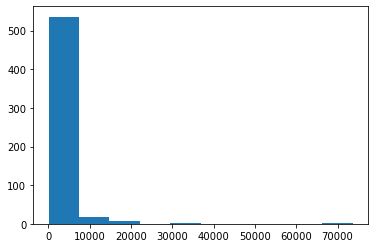

In [40]:
plt.hist(real_df['comment_num'])

(array([559.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([8.2000000e+01, 1.8876530e+05, 3.7744860e+05, 5.6613190e+05,
        7.5481520e+05, 9.4349850e+05, 1.1321818e+06, 1.3208651e+06,
        1.5095484e+06, 1.6982317e+06, 1.8869150e+06]),
 <BarContainer object of 10 artists>)

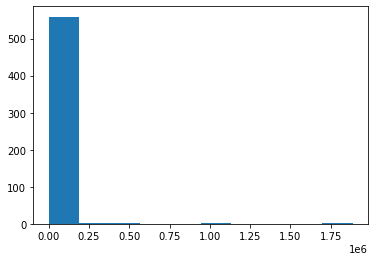

In [41]:
plt.hist(real_df['repost_num'])

(array([525.,  19.,   9.,   2.,   4.,   1.,   0.,   0.,   1.,   2.]),
 array([7.060000e+02, 1.068783e+05, 2.130506e+05, 3.192229e+05,
        4.253952e+05, 5.315675e+05, 6.377398e+05, 7.439121e+05,
        8.500844e+05, 9.562567e+05, 1.062429e+06]),
 <BarContainer object of 10 artists>)

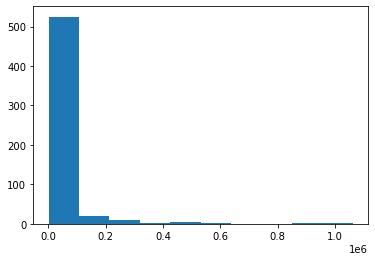

In [42]:
plt.hist(real_df['like_num'])

In [43]:
num_df = real_df[['comment_num','repost_num','like_num']]
num_df

,comment_num,repost_num,like_num
0,396,601,3955
4,354,255,1980
8,1663,1997,30705
15,1028,504,7509
19,921,392,9500
...,...,...,...
1748,934,807,8750
1755,2091,263,21436
1757,2009,1784,41240
1758,659,539,5327


<AxesSubplot:>

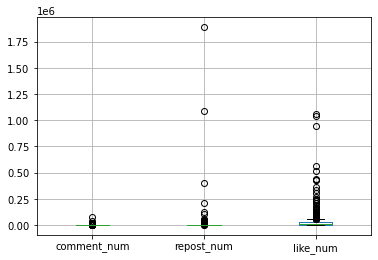

In [44]:
num_df.boxplot()

In [45]:
def get_outlier(df=None, column=None, weight=1.5):
  quantile_25 = np.percentile(num_df['like_num'].values, 25)
  quantile_75 = np.percentile(num_df['like_num'].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = num_df['like_num'][ (num_df['like_num'] < lowest) | (num_df['like_num'] > highest) ].index
  return outlier_idx

outlier_idx = get_outlier(df=num_df, column=['like_num'], weight=1.5)
num_df.drop(outlier_idx, axis=0, inplace=True)

C:\Users\YS\AppData\Local\Temp\ipykernel_12284\753883851.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df.drop(outlier_idx, axis=0, inplace=True)


In [46]:
def get_outlier2(df=None, column=None, weight=1.5):
  quantile_25 = np.percentile(num_df['repost_num'].values, 25)
  quantile_75 = np.percentile(num_df['repost_num'].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = num_df['repost_num'][ (num_df['repost_num'] < lowest) | (num_df['repost_num'] > highest) ].index
  return outlier_idx

outlier_idx = get_outlier(df=num_df, column=['repost_num'], weight=1.5)
num_df.drop(outlier_idx, axis=0, inplace=True)

C:\Users\YS\AppData\Local\Temp\ipykernel_12284\660924254.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df.drop(outlier_idx, axis=0, inplace=True)


In [47]:
num_df

,comment_num,repost_num,like_num
0,396,601,3955
4,354,255,1980
8,1663,1997,30705
15,1028,504,7509
19,921,392,9500
...,...,...,...
1743,473,818,3247
1748,934,807,8750
1755,2091,263,21436
1758,659,539,5327


<AxesSubplot:>

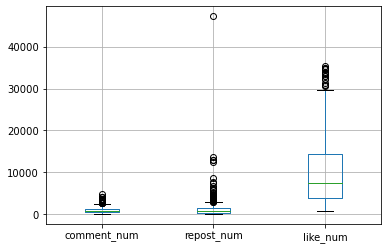

In [48]:
num_df.boxplot()

array([[<AxesSubplot:title={'center':'comment_num'}>,
        <AxesSubplot:title={'center':'repost_num'}>],
       [<AxesSubplot:title={'center':'like_num'}>, <AxesSubplot:>]],
      dtype=object)

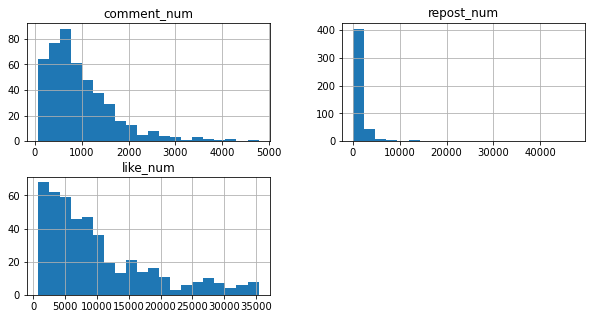

In [49]:
num_df.hist(bins=20, figsize=(10,5))

In [50]:
import nltk
from nltk.tokenize import sent_tokenize

In [51]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import spacy
from spacy import displacy
from spacy.lang.zh import Chinese
Chinese.Defaults.use_jieba = False
nlp = Chinese()

In [27]:
# Disable jieba through tokenizer config options
cfg = {"use_jieba": False}
nlp = Chinese(meta={"tokenizer": {"config": cfg}})
# Load with "default" model provided by pkuseg
cfg = {"pkuseg_model": "default", "require_pkuseg": True}
nlp = Chinese(meta={"tokenizer": {"config": cfg}})

NameError: name 'Chinese' is not defined

In [79]:
nlp = Chinese()
d1 = nlp(real_df['text'][0])
d1

【转存！#施一公说诚实做学问是绝不容突破的底线#】今天，在西湖大学博士研究生开学典礼上，校长施一公致辞时说：“新冠疫情绝不是人类面临的唯一危机或最后难题，它只是人类历史长河中又一次新的挑战。我们正在面对百年未有之大变局，要想在变局中开新局，科学与技术的价值和力量日益显现。做诚实的学问是科学研究中一条不容突破的底线。”L中新视频的微博视频

In [80]:
tokenized_text = pd.DataFrame()
#describe the words in the sentence before
for i, token in enumerate(d1):
    tokenized_text.loc[i, 'text'] = token.text
    tokenized_text.loc[i, 'type'] = token.pos_
    tokenized_text.loc[i, 'lemma'] = token.lemma_,
    tokenized_text.loc[i, 'is_alphabetic'] = token.is_alpha
    tokenized_text.loc[i, 'is_stop'] = token.is_stop
    tokenized_text.loc[i, 'is_punctuation'] = token.is_punct
    tokenized_text.loc[i, 'sentiment'] = token.sentiment
    
    

tokenized_text[:10]

,text,type,lemma,is_alphabetic,is_stop,is_punctuation,sentiment
0,【,,"(,)",False,True,True,0.0
1,转,,"(,)",True,False,False,0.0
2,存,,"(,)",True,False,False,0.0
3,！,,"(,)",False,True,True,0.0
4,#,,"(,)",False,True,True,0.0
5,施,,"(,)",True,False,False,0.0
6,一,,"(,)",True,True,False,0.0
7,公,,"(,)",True,False,False,0.0
8,说,,"(,)",True,False,False,0.0
9,诚,,"(,)",True,False,False,0.0


In [28]:
pip install googletrans==3.1.0a0

Note: you may need to restart the kernel to use updated packages.


In [81]:
import googletrans
from googletrans import Translator

translator = Translator()
# available languages for translation
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [82]:
cols=real_df['text']
translations = []
for column in cols:
    translations.append(translator.translate(column).text)

In [83]:
real_df['textEnglish'] = translations

In [84]:
real_df['textEnglish']

0       【save to! #柏一公说真实做学 is the bottom line that mu...
4       【#大连去去凯洋海鲜食品公司和外围企业#】This morning, Dalian held...
8       [#全球单日新指查消消15万创新高#, #WHO 说世界在新病dangerous stage...
15      [Daocheng #安全4km Altitude Playing Songs to App...
19      [#中央已经发布特别实位值184元元#] Sun Guofeng, director of ...
                              ...                        
1748    [#在日外学生vlog内容健康包发布#] On April 19, Long Lei, a ...
1755    [People's Live: #湖北病症控制Work Conference#] At 4:...
1757    [#WHO affirms China's revised new crown case d...
1758    [#白病控制内实验的少鸡了回家#] On the 25th, the police from...
1759    [#多地地球地堇元宵节灯光惊为武汉#] February 8th, the fifteent...
Name: textEnglish, Length: 563, dtype: object

In [85]:
import nltk
from collections import Counter

# Create a list of stopwords
stopwords = nltk.corpus.stopwords.words('english')
# Create a list of punctuation marks
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))


words = (real_df.textEnglish
           .str.lower()
           .str.cat(sep=' ')
           .split()
        )

l=[]

for i in words:
    if i not in RE_stopwords:
        l.append(i)

In [86]:
mostFrequentWords = pd.DataFrame(Counter(l).most_common(40),
                    columns=['Word', 'Frequency'])

mostFrequentWords.head(10)

,Word,Frequency
0,video,471
1,weibo,463
2,new,365
3,epidemic,324
4,people's,300
5,medical,254
6,daily,229
7,control,224
8,prevention,219
9,pneumonia,183


In [87]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.bar(mostFrequentWords,
             x='Frequency',
             y='Word',
             title='The 40 words most mentioned in the news',
             color='Frequency',
             barmode='stack')

fig.update_layout(
   paper_bgcolor='#0b1f65',
   plot_bgcolor='#0b1f65',
    font_family="Arial",
    font_color="white",
    title_font_family="Arial",
    title_font_color="white",
    legend_title_font_color="white",
    xaxis = { 
    'showgrid': False, 
    'zeroline': True, 
    'visible': True,
    
    },
    yaxis = { 
    'showgrid': False, 
    'zeroline': True, 
    'visible': True,
    
    }
    
)




# plot
fig.show()

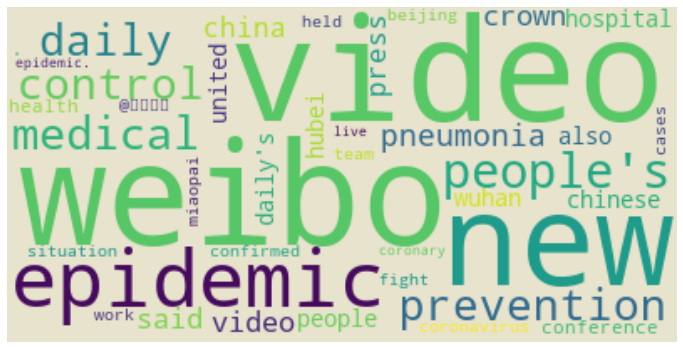

In [88]:
d = {}
for a, x in mostFrequentWords.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='#e8e3cc',max_font_size = 86, random_state = 42)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=[12, 8])
figure_size=(24.0,16.0)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()